In [1]:
import random
import torch
from torch import nn
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# 设置全局字体族为黑体
plt.rcParams['font.family'] = ['SimHei']
# 设置全局无衬线字体为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 关闭Matplotlib使用Unicode负号的默认行为，改用普通ASCII负号
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 构建语料库，包含中文，解码器输入英文，翻译后的目标输出英文
corpus = [
    ['咖哥 喜欢 小冰', '<sos> KaGe likes XiaoBing', 'KaGe likes XiaoBing <eos>'],
    ['我 爱 学习 人工智能', '<sos> I love studying AI', 'I love studying AI <eos>'],
    ['深度学习 改变 世界', '<sos> DL changed the world', 'DL changed the world <eos>'],
    ['自然 语言 处理 很 强大', '<sos> NLP is so powerful', 'NLP is so powerful <eos>'],
    ['神将网络 非常 复杂', '<sos> Neural-Nets are complex', 'Neural-Nets are complex <eos>']
]
print('语料库句子数量：', len(corpus))

语料库句子数量： 5


In [4]:
# 构建中英词汇表
word_vocabulary_cn = []
word_vocabulary_en = []

for sentence in corpus:
    for token in sentence[0].split():
        if token not in word_vocabulary_cn:
            word_vocabulary_cn.append(token)
    
    for token in sentence[1].split():
        if token not in word_vocabulary_en:
            word_vocabulary_en.append(token)

    for token in sentence[2].split():
        if token not in word_vocabulary_en:
            word_vocabulary_en.append(token)

len_word_vocabulary_cn = len(word_vocabulary_cn)
len_word_vocabulary_en = len(word_vocabulary_en)
print('中文词汇表词汇数量：', len_word_vocabulary_cn)
print('英文词汇表词汇数量：', len_word_vocabulary_en)

中文词汇表词汇数量： 18
英文词汇表词汇数量： 20


In [5]:
# 构建中英字典词表
word_vocabulary_cn_to_index_vocabulary = {token : index for index, token in enumerate(word_vocabulary_cn)}
word_vocabulary_en_to_index_vocabulary = {token : index for index, token in enumerate(word_vocabulary_en)}
index_vocabulary_to_word_vocabulary_cn = {index : token for index, token in enumerate(word_vocabulary_cn)}
index_vocabulary_to_word_vocabulary_en = {index : token for index, token in enumerate(word_vocabulary_en)}
print('中文词汇索引表', word_vocabulary_cn_to_index_vocabulary)
print('英文词汇索引表', word_vocabulary_en_to_index_vocabulary)
print('索引中文词汇表', index_vocabulary_to_word_vocabulary_cn)
print('索引英文词汇表', index_vocabulary_to_word_vocabulary_en)

中文词汇索引表 {'咖哥': 0, '喜欢': 1, '小冰': 2, '我': 3, '爱': 4, '学习': 5, '人工智能': 6, '深度学习': 7, '改变': 8, '世界': 9, '自然': 10, '语言': 11, '处理': 12, '很': 13, '强大': 14, '神将网络': 15, '非常': 16, '复杂': 17}
英文词汇索引表 {'<sos>': 0, 'KaGe': 1, 'likes': 2, 'XiaoBing': 3, '<eos>': 4, 'I': 5, 'love': 6, 'studying': 7, 'AI': 8, 'DL': 9, 'changed': 10, 'the': 11, 'world': 12, 'NLP': 13, 'is': 14, 'so': 15, 'powerful': 16, 'Neural-Nets': 17, 'are': 18, 'complex': 19}
索引中文词汇表 {0: '咖哥', 1: '喜欢', 2: '小冰', 3: '我', 4: '爱', 5: '学习', 6: '人工智能', 7: '深度学习', 8: '改变', 9: '世界', 10: '自然', 11: '语言', 12: '处理', 13: '很', 14: '强大', 15: '神将网络', 16: '非常', 17: '复杂'}
索引英文词汇表 {0: '<sos>', 1: 'KaGe', 2: 'likes', 3: 'XiaoBing', 4: '<eos>', 5: 'I', 6: 'love', 7: 'studying', 8: 'AI', 9: 'DL', 10: 'changed', 11: 'the', 12: 'world', 13: 'NLP', 14: 'is', 15: 'so', 16: 'powerful', 17: 'Neural-Nets', 18: 'are', 19: 'complex'}


In [6]:
# 生成训练数据
def make_train_data(corpus):
    sentence = random.choice(corpus)
    encoder_input = torch.tensor([[word_vocabulary_cn_to_index_vocabulary[token] for token in sentence[0].split()]])
    decoder_input = torch.tensor([[word_vocabulary_en_to_index_vocabulary[token] for token in sentence[1].split()]])
    target = torch.tensor([[word_vocabulary_en_to_index_vocabulary[token] for token in sentence[2].split()]])
    return encoder_input, decoder_input, target

# 验证
encoder_input, decoder_input, target = make_train_data(corpus)
print('编码器输入:', encoder_input)
print('编码器输入形状：', encoder_input.size())
print('解码器输入:', encoder_input)
print('解码器输入形状：', decoder_input.size())
print('目标:', encoder_input)
print('目标形状：', target.size())
for sentence in corpus:
    if all(word_vocabulary_cn_to_index_vocabulary[token] in encoder_input for token in sentence[0].split()):
    # all(iterable)判断可迭代对象所有元素是否满足某个条件，如果所有元素都为True或等价于True的值，则返回True，否则返回False
    # 如果可迭代对象为空，则返回True，没有元素违反条件
    # 短路操作，一旦遇到第一个False，就会立即返回False
        original_sentence = sentence
        break
print('原始句子：', original_sentence)

编码器输入: tensor([[7, 8, 9]])
编码器输入形状： torch.Size([1, 3])
解码器输入: tensor([[7, 8, 9]])
解码器输入形状： torch.Size([1, 5])
目标: tensor([[7, 8, 9]])
目标形状： torch.Size([1, 5])
原始句子： ['深度学习 改变 世界', '<sos> DL changed the world', 'DL changed the world <eos>']


In [7]:
# 构建编码器
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.rnn = nn.RNN(hidden_size, hidden_size, batch_first=True)

    def forward(self, encoder_input, hidden):
        output, hidden = self.rnn(self.embedding(encoder_input), hidden)
        return output, hidden

In [8]:
hidden_size = 128
encoder = Encoder(len_word_vocabulary_cn, hidden_size)
print('编码器结构：\n', encoder)

编码器结构：
 Encoder(
  (embedding): Embedding(18, 128)
  (rnn): RNN(128, 128, batch_first=True)
)


In [9]:
# 构建缩放点击注意力
class Attention(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, decoder_context, encoder_context):
        similarity_score = torch.matmul(decoder_context, encoder_context.transpose(-2, -1))
        scale_factor = decoder_context.size(-1) ** 0.5
        scale_weight = similarity_score / scale_factor
        attn_weight = nn.functional.softmax(scale_weight, dim=-1)
        context = torch.matmul(attn_weight, encoder_context)
        return context, attn_weight

In [10]:
# 构建解码器
class DecoderWithAttention(nn.Module):
    def __init__(self, output_size, hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.rnn = nn.RNN(hidden_size, hidden_size, batch_first=True)
        self.attention = Attention()
        self.fc = nn.Linear(hidden_size * 2, output_size)

    def forward(self, decoder_input, hidden, encoder_output):
        rnn_output, rnn_hidden = self.rnn(self.embedding(decoder_input), hidden)
        context, attn_weight = self.attention(rnn_output, encoder_output)
        decoder_output = self.fc(torch.cat((rnn_output, context), dim=-1))
        # torch.cat(tensors, dim=0, *, out=None)将多个张量沿指定维度拼接
        # tensors要拼接的张量序列，所有张量必须具有相同形状，除了拼接维度之外
        # dim指定拼接维度，默认为0，沿第一个维度拼接
        # out可选，指定输出张量存储位置，如果提供，结果直接写入该张量
        return decoder_output, rnn_hidden, attn_weight

In [11]:
decoder = DecoderWithAttention(len_word_vocabulary_en, hidden_size)
print('解码器结构：\n', decoder)

解码器结构：
 DecoderWithAttention(
  (embedding): Embedding(20, 128)
  (rnn): RNN(128, 128, batch_first=True)
  (attention): Attention()
  (fc): Linear(in_features=256, out_features=20, bias=True)
)


In [12]:
# 构建编码器-解码器架构
class Seq2Seq(nn.Module):
    def __init__(self, Encoder, Decoder):
        super().__init__()
        self.encoder = Encoder
        self.decoder = Decoder

    def forward(self, encoder_input, hidden, decoder_input):
        encoder_output, encoder_hidden = self.encoder(encoder_input, hidden)
        decoder_output, _, attn_weight = self.decoder(decoder_input, encoder_hidden, encoder_output)
        return decoder_output, attn_weight

In [13]:
model = Seq2Seq(encoder, decoder)
print('编码器-解码器架构：\n', model)

编码器-解码器架构：
 Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(18, 128)
    (rnn): RNN(128, 128, batch_first=True)
  )
  (decoder): DecoderWithAttention(
    (embedding): Embedding(20, 128)
    (rnn): RNN(128, 128, batch_first=True)
    (attention): Attention()
    (fc): Linear(in_features=256, out_features=20, bias=True)
  )
)


In [14]:
# 模型训练
def train(model, criterion, optimizer, epochs):
    for epoch in range(epochs):
        encoder_input, decoder_input, target = make_train_data(corpus)
        hidden = torch.zeros(1, encoder_input.size(0), hidden_size)
        optimizer.zero_grad()
        output, _ = model(encoder_input, hidden, decoder_input)
        loss = criterion(output.view(-1, len_word_vocabulary_en), target.view(-1))
        if (epoch + 1) % 40 == 0:
            print(f'Epoch:{epoch + 1} cost={loss:.6f}')
        loss.backward()
        optimizer.step()

In [15]:
epochs = 400
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train(model, criterion, optimizer, epochs)

Epoch:40 cost=0.136155
Epoch:80 cost=0.121237
Epoch:120 cost=0.014272
Epoch:160 cost=0.010272
Epoch:200 cost=0.012112
Epoch:240 cost=0.010591
Epoch:280 cost=0.006902
Epoch:320 cost=0.003729
Epoch:360 cost=0.003586
Epoch:400 cost=0.004429


In [16]:
# 可视化编码器-解码器注意力效果
def visualize_attention(predict_sentence, predicted_sentence, attn_weight):
    plt.figure()
    ax = sns.heatmap(
        attn_weight,
        annot=True,
        cbar=False,
        xticklabels=predict_sentence.split(),
        yticklabels=predicted_sentence,
        cmap='Greens'
    )
    plt.xlabel('源序列')
    plt.ylabel('目标序列')
    plt.show()

In [17]:
def text(model, predict_sentence):
    encoder_input = torch.tensor([[word_vocabulary_cn_to_index_vocabulary[token] for token in predict_sentence.split()]])
    decoder_input = torch.tensor([word_vocabulary_en_to_index_vocabulary['<sos>']] +
                                  [word_vocabulary_en_to_index_vocabulary['<eos>']] *
                                  (len(encoder_input[0] - 1)))
    decoder_input = decoder_input.unsqueeze(0)
    hidden = torch.zeros(1, encoder_input.size(0), hidden_size)
    predict, attn_weight = model(encoder_input, hidden, decoder_input)
    predict = predict.max(2, keepdim=True)[1]
    print(predict_sentence, '--->', [index_vocabulary_to_word_vocabulary_en[n.item()] for n in predict.squeeze()])
    attn_weight = attn_weight.squeeze(0).detach()
    visualize_attention(predict_sentence, [index_vocabulary_to_word_vocabulary_en[n.item()] for n in predict.squeeze()], attn_weight)

咖哥 喜欢 小冰 ---> ['KaGe', 'likes', 'XiaoBing', 'XiaoBing']


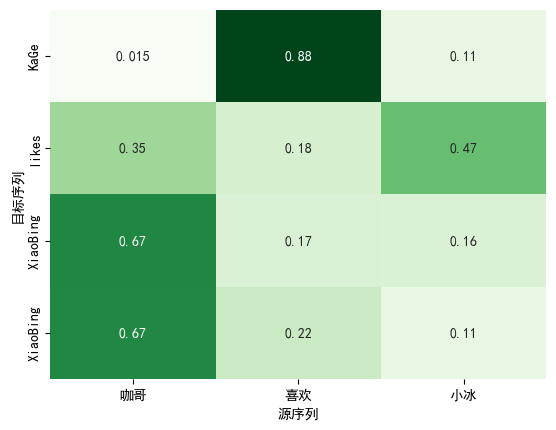

In [18]:
text(model, '咖哥 喜欢 小冰')

自然 语言 处理 很 强大 ---> ['NLP', 'is', 'NLP', 'NLP', 'NLP', 'NLP']


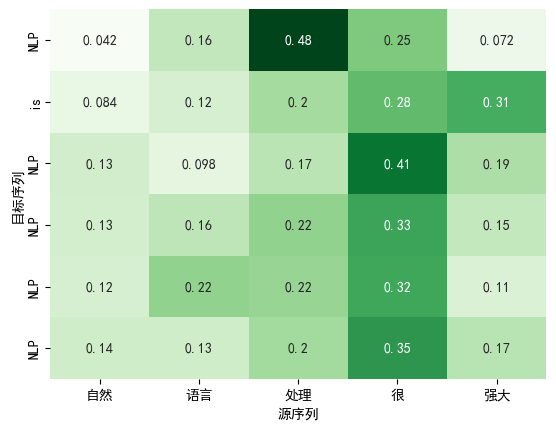

In [19]:
text(model, '自然 语言 处理 很 强大')